In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [226]:
def recirculate(inps, w1, w2, lr=20, reg=0.75, update=True):
    # Visible units + bias
    v = np.ones((5, 2))
    # Reconstructed input
    v_out = np.empty(inps.shape)
    h_out = np.empty((2, 4))
    # Hidden units + bias
    h = np.ones((3, 2))
    # Weight matrix updates
    dw1 = np.empty(tuple([inps.shape[1]]) + w1.shape)
    dw2 = np.empty(tuple([inps.shape[1]]) + w2.shape)
    
    def logistic(x):
        return 1 / (1 + np.exp(-x))
    
    def relu(x):
        return np.maximum(x, 0)
    
    for i in range(inps.shape[1]):
        v[:-1, 0] = inps[:, i]
        h[:-1, 0] = np.tanh(w1 @ v[:, 0])
        v[:-1, 1] = reg * v[:-1, 0] + (1 - reg) * relu(w2 @ h[:, 0])
        h[:-1, 1] = np.tanh(w1 @ v[:, 1])
        dw1[i, :, :] = lr * (h[:-1, 0] - h[:-1, 1])[:, np.newaxis] @ v[:, 1][np.newaxis, :]
        dw2[i, :, :] = lr * (v[:-1, 0] - v[:-1, 1])[:, np.newaxis] @ h[:, 0][np.newaxis, :]
        v_out[:, i] = v[:-1, 1]
        h_out[:, i] = h[:-1, 0]
        
    if update:
        w1 = w1 + dw1.sum(axis=0)
        w2 = w2 + dw2.sum(axis=0)
        
    return w1, w2, v_out, h_out
    

In [240]:
# Visible to hidden weights
w1 = np.random.random((2, 5)) - 0.5
# Hidden to visible weights
w2 = np.random.random((4, 3)) - 0.5

# Input batch
inps = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]]).T

error = np.empty(100)
for i in range(100):
    _, _, v_out, _ = recirculate(inps, w1, w2, lr=0, reg=0, update=False)
    error[i] = 0.5 * ((inps - v_out) ** 2).sum()    
    
    w1, w2, _, _ = recirculate(inps, w1, w2, lr=1, reg=0.75, update=True)

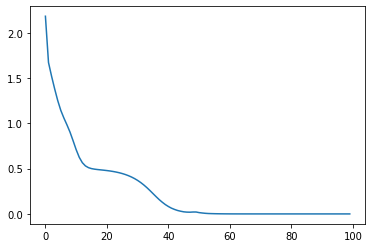

In [241]:
fig = plt.figure()
ax = fig.subplots(1, 1)
ax.plot(error)
plt.show()

In [242]:
_, _, v_out, h_out = recirculate(inps, w1, w2, lr=5, reg=0, update=False)
print(v_out)
print(h_out)

[[9.99996538e-01 0.00000000e+00 1.12063241e-05 4.57087215e-06]
 [0.00000000e+00 9.99988346e-01 0.00000000e+00 0.00000000e+00]
 [7.77935895e-06 4.25896774e-06 9.99995063e-01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000064e+00]]
[[-0.15773186  0.02603644 -0.79585457  0.89259688]
 [-0.81376667  0.83924587  0.02733514 -0.01325793]]


In [233]:
np.sqrt(2 * 0.63 ** 2)

0.8909545442950499